# Ngram analysis across categories and time

Here we analyzed the ngrams(1,2,3) of the headlines across different categories using interactive plot created with dash.
1. analyzing ngrams over time periods

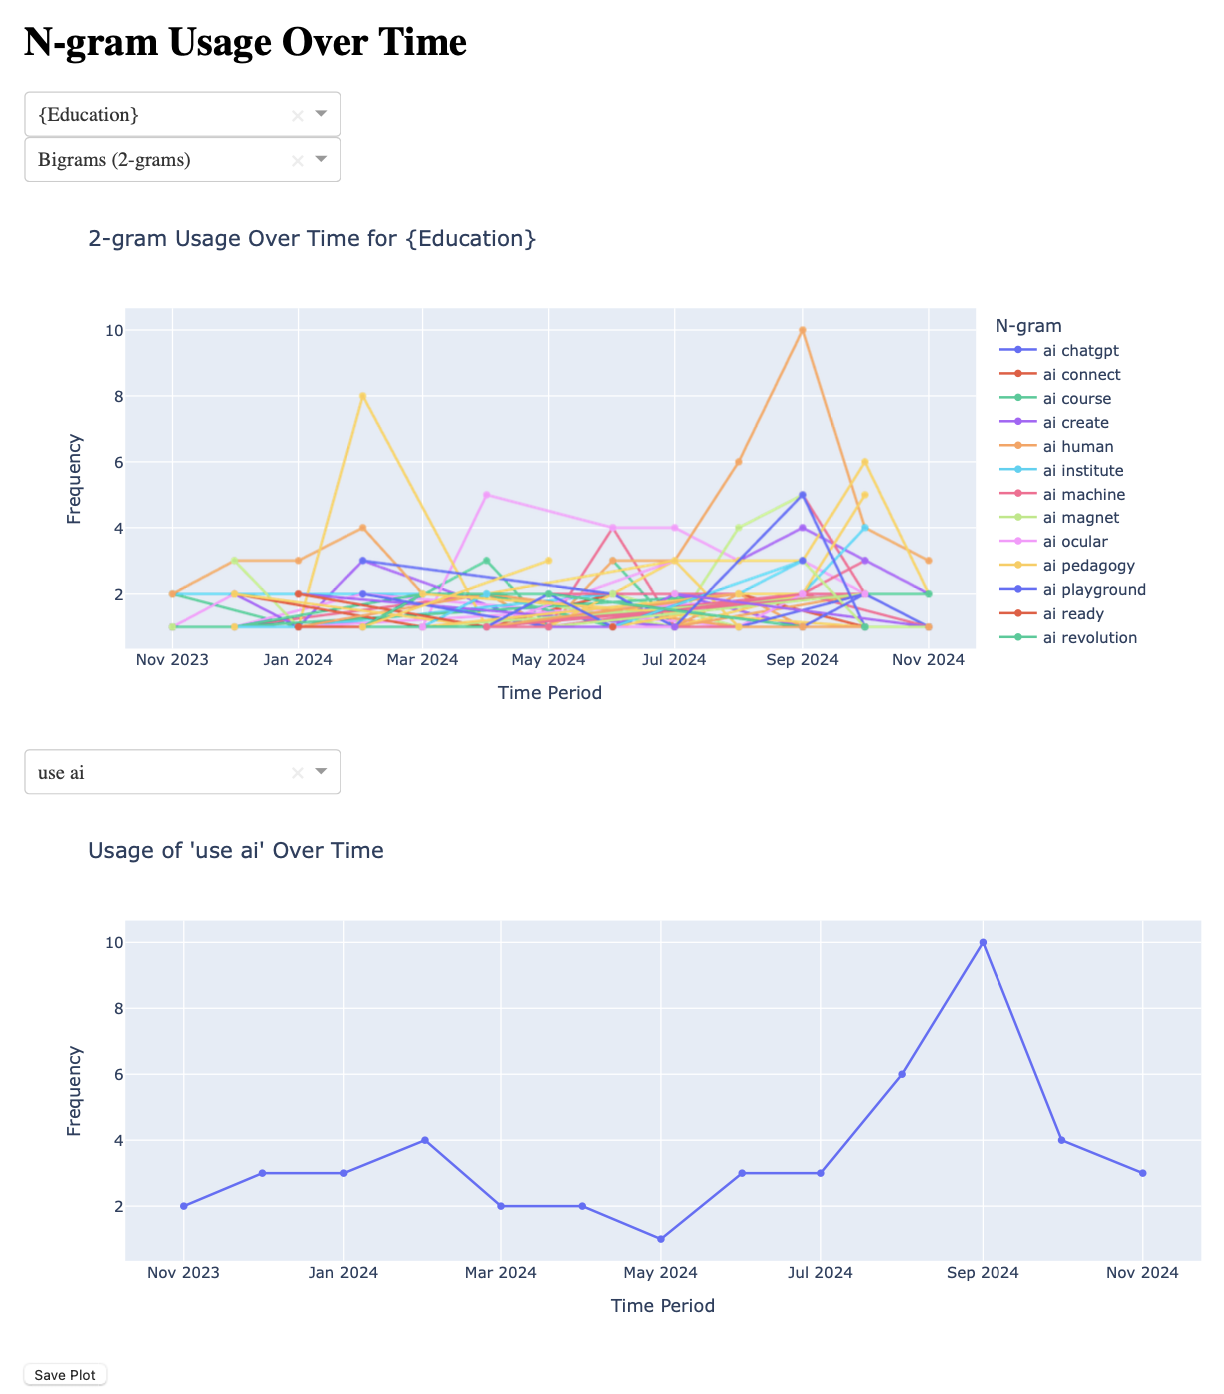
2. analyzing ngrams across categories
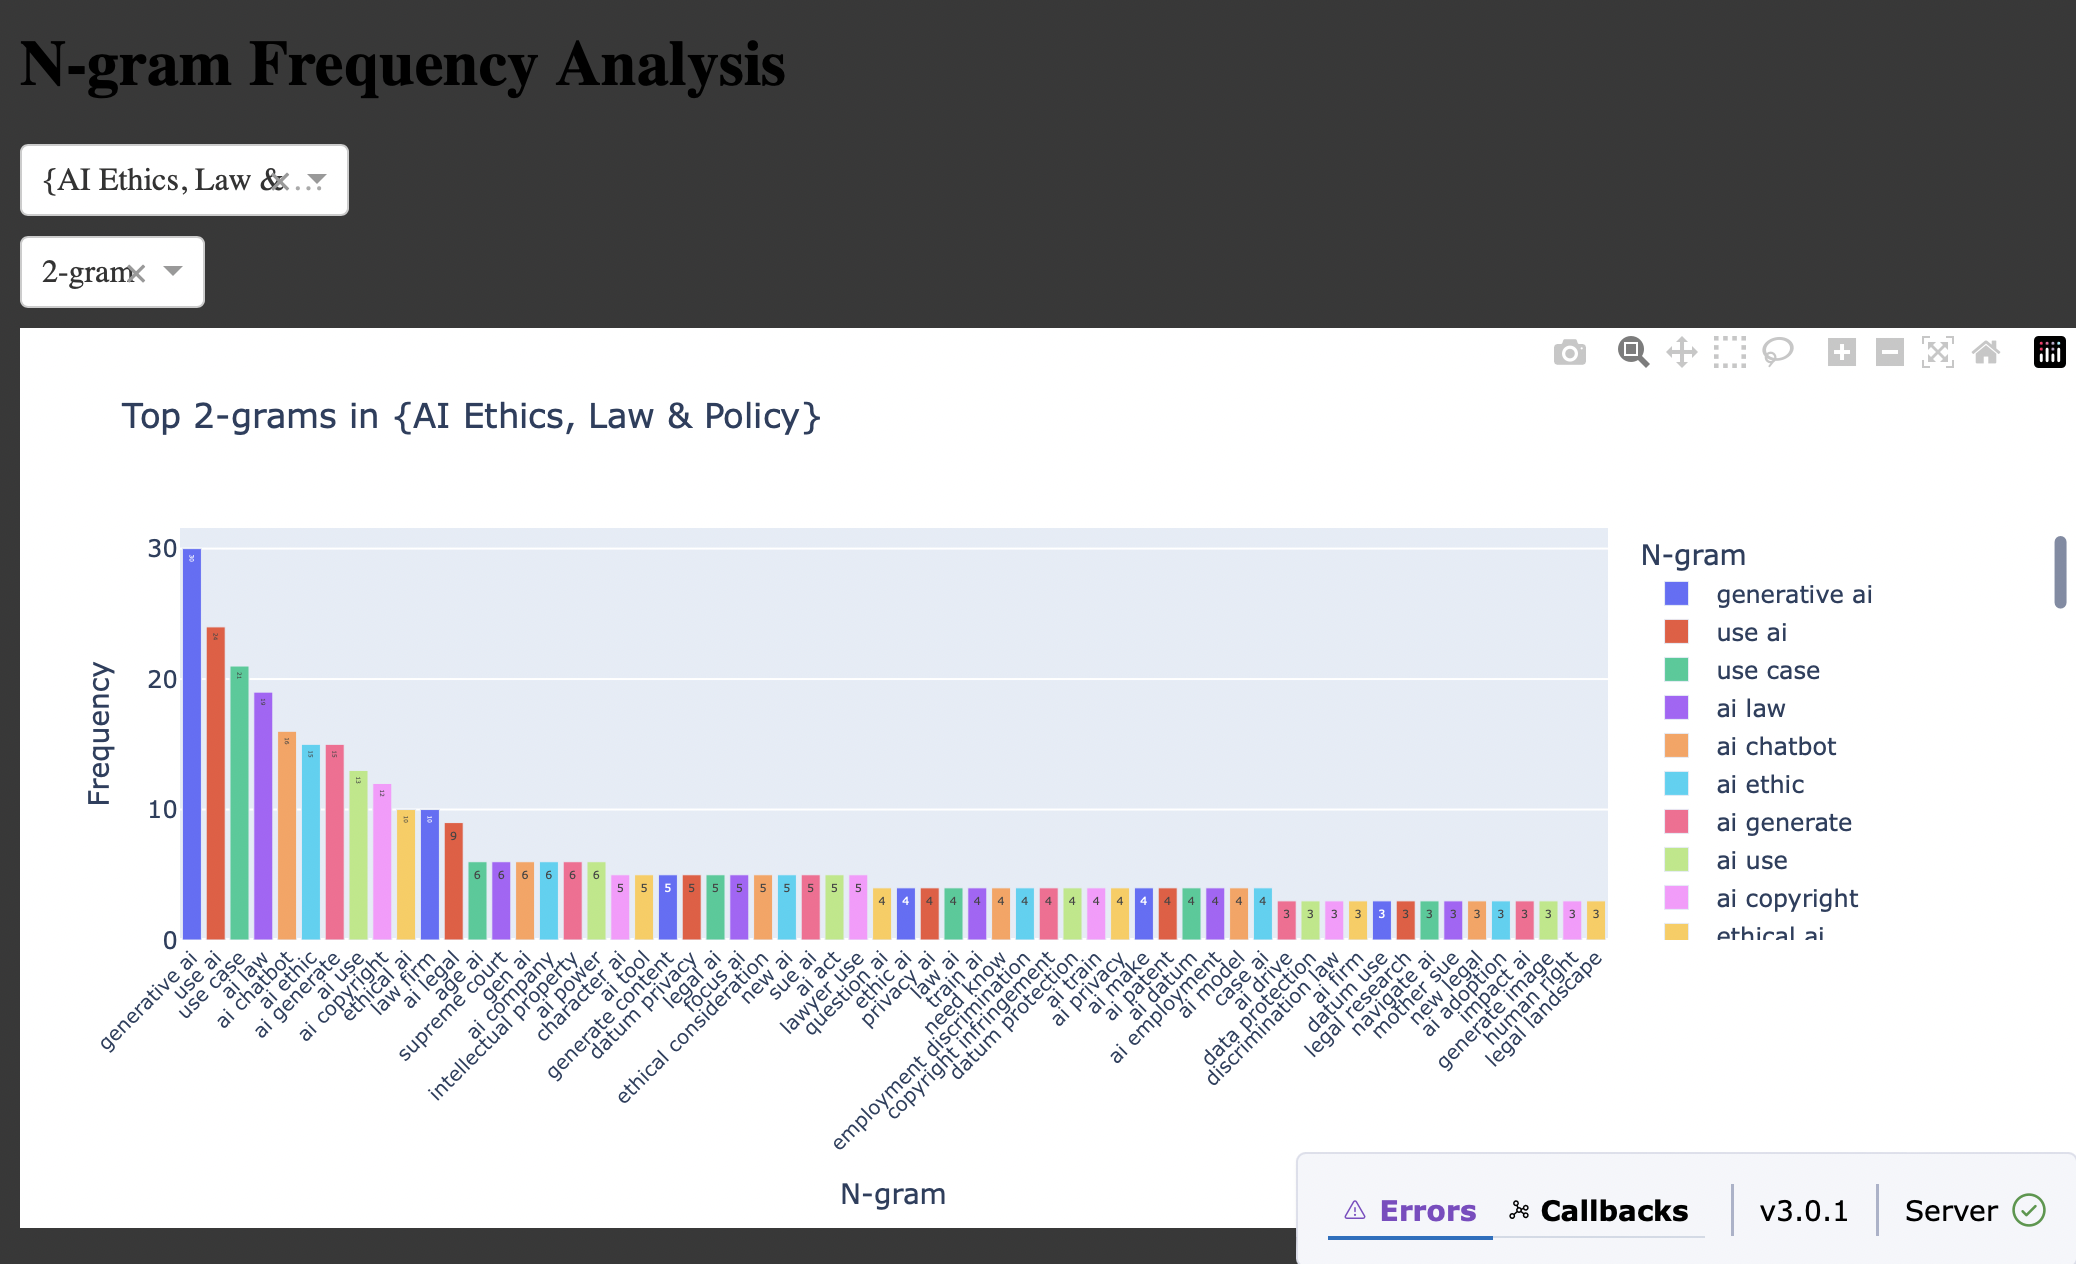

You have to run the dash app code inorder to use the interactive plots

## 1. preparing data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
emb = pd.read_csv('datasets/embedding_data.csv')
df = pd.read_csv('datasets/data-ner.csv')
sent = pd.read_csv('datasets/all_sentiments_and_cat_pred_twrob_10k.csv')

In [ ]:
entity_labels1 = ['CARDINAL','DATE','EVENT','FAC','GPE','LANGUAGE','LAW','LOC','MONEY','NORP','ORDINAL','ORG','PERCENT','PERSON','PRODUCT','QUANTITY','TIME','WORK_OF_ART']

In [ ]:
import ast
for l in entity_labels1:
  df[l] =df[l].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else x)

In [ ]:
sent1 = sent[['Unnamed: 0', 'date', 'source', 'number_of_characters_title',
       'number_of_words_title', 'day_of_week', 'month', 'year', 'quarter',
       'is_weekend', 'category', 'Topic', 'broad_probs',
       'society_probs', 'prediction_set', 'probabilities', 'openAI_sentiment', 'vader_sentiment', 'tb_polarity', 'tb_opnion',
       'afinn_score', 'flair_sentiment', 'flair_score', 'z-vader', 'z-afinn',
       'z-tb', 'roberta_score', 'roberta_score1', 'z-roberta', 'twrob_sent',
       'twrob_sent_label']]

In [ ]:
df1 = pd.concat([emb[['Unnamed: 0','x1','y1']],df,sent1],axis=1)

In [ ]:
df1['prediction_set'] =df1['prediction_set'].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else x)

In [ ]:
df1.columns

Index(['Unnamed: 0', 'x1', 'y1', 'Unnamed: 0.1', 'Unnamed: 0', 'title',
       'title1', 'title2', 'title3', 'CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE',
       'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT',
       'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART', 'Unnamed: 0',
       'date', 'source', 'number_of_characters_title', 'number_of_words_title',
       'day_of_week', 'month', 'year', 'quarter', 'is_weekend', 'category',
       'Topic', 'broad_probs', 'society_probs', 'prediction_set',
       'probabilities', 'openAI_sentiment', 'vader_sentiment', 'tb_polarity',
       'tb_opnion', 'afinn_score', 'flair_sentiment', 'flair_score', 'z-vader',
       'z-afinn', 'z-tb', 'roberta_score', 'roberta_score1', 'z-roberta',
       'twrob_sent', 'twrob_sent_label'],
      dtype='object')

In [ ]:
df1.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 21.2 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
df1.columns

Index(['x1', 'y1', 'Unnamed: 0.1', 'title', 'title1', 'title2', 'title3',
       'CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC',
       'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT',
       'QUANTITY', 'TIME', 'WORK_OF_ART', 'date', 'source',
       'number_of_characters_title', 'number_of_words_title', 'day_of_week',
       'month', 'year', 'quarter', 'is_weekend', 'category', 'Topic',
       'broad_probs', 'society_probs', 'prediction_set', 'probabilities',
       'openAI_sentiment', 'vader_sentiment', 'tb_polarity', 'tb_opnion',
       'afinn_score', 'flair_sentiment', 'flair_score', 'z-vader', 'z-afinn',
       'z-tb', 'roberta_score', 'roberta_score1', 'z-roberta', 'twrob_sent',
       'twrob_sent_label'],
      dtype='object')

In [ ]:
df1['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


In [ ]:

import re
import nltk
from nltk.util import ngrams
from collections import Counter
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df1['date'] = pd.to_datetime(df1['date'])
df1['title2'] = df1['title2'].fillna(' ')
df1['month'] = df1['date'].dt.to_period('M')

In [ ]:
import spacy
import pandas as pd

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Sample DataFrame


# Function for lemmatization
def lemmatize_text_spacy(text):
    doc = nlp(text)
    return " ".join(token.lemma_ for token in doc)

# Apply to DataFrame column
df1['title2'] = df1['title2'].apply(lemmatize_text_spacy)





In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#df1['main'] = df1['prediction_set'].apply(lambda x : x[0] if len(x)>0 else '')

In [ ]:
# import pandas as pd
# import plotly.express as px
# import dash
# from dash import dcc, html
# from dash.dependencies import Input, Output
# import plotly.io as pio
# from sklearn.feature_extraction.text import CountVectorizer


# cat = "{Education}"
# a = df1[df1['prediction_set'].apply(lambda x: cat in x)].copy()

# # Function to generate n-grams
# def get_ngrams(texts, n=2):
#     vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
#     X = vectorizer.fit_transform(texts)
#     ngram_counts = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))
#     return ngram_counts

# # Compute bigram and trigram frequencies for each month
# ngram_data = []
# for month, group in a.groupby('month'):
#     bigrams = get_ngrams(group['title2'], n=2)
#     trigrams = get_ngrams(group['title2'], n=3)

#     # Combine n-grams and add month info
#     for ngram, count in {**bigrams, **trigrams}.items():
#         ngram_data.append({"month": str(month), "ngram": ngram, "count": count})

# # Convert to DataFrame
# ngram_df1 = pd.DataFrame(ngram_data)
# ngram_df = ngram_df1[ngram_df1['count']>=1]
# # Get list of unique n-grams
# unique_ngrams = ngram_df['ngram'].unique()

# # Create Dash app
# app = dash.Dash(__name__)

# # Layout with Dropdown and Save Button
# app.layout = html.Div([
#     html.H1("N-gram Usage Over Time"),

#     # Dropdown for selecting n-grams
#     dcc.Dropdown(
#         id='ngram-dropdown',
#         options=[{'label': ngram, 'value': ngram} for ngram in unique_ngrams],
#         value=unique_ngrams[0],  # Default selected ngram
#         multi=False,
#         style={"width": "50%"}
#     ),

#     # Graph to show ngram usage for all n-grams
#     dcc.Graph(id='ngram-usage-all-plot'),

#     # Graph to show ngram usage for selected n-gram
#     dcc.Graph(id='ngram-usage-plot'),

#     # Button to save the plot
#     html.Button('Save Plot', id='save-button', n_clicks=0),
# ])

# # Update first graph to show all n-grams
# @app.callback(
#     Output('ngram-usage-all-plot', 'figure'),
#     [Input('ngram-dropdown', 'value')]
# )
# def update_all_graph(_):
#     # Plot the n-gram frequencies for all n-grams
#     fig_all = px.line(ngram_df, x="month", y="count", color="ngram", markers=True,
#                       title="Usage of All N-grams Over Time",
#                       labels={"month": "Time Period", "count": "Frequency", "ngram": "N-gram"})
#     return fig_all

# # Update second graph based on selected n-gram
# @app.callback(
#     Output('ngram-usage-plot', 'figure'),
#     [Input('ngram-dropdown', 'value')]
# )
# def update_selected_graph(selected_ngram):
#     # Filter data for the selected ngram
#     filtered_df = ngram_df[ngram_df['ngram'] == selected_ngram]

#     # Plot the n-gram usage over time for the selected ngram
#     fig = px.line(filtered_df, x="month", y="count", markers=True,
#                   title=f"Usage of '{selected_ngram}' Over Time",
#                   labels={"month": "Time Period", "count": "Frequency"})

#     return fig

# # Callback for saving the plot as HTML
# @app.callback(
#     Output('save-button', 'children'),
#     [Input('save-button', 'n_clicks')],
#     prevent_initial_call=True
# )
# def save_plot(n_clicks):
#     if n_clicks > 0:
#         # Save the first graph (or any figure you want) as an HTML file
#         fig = px.line(ngram_df, x="month", y="count", color="ngram", markers=True,
#                       title="Usage of All N-grams Over Time",
#                       labels={"month": "Time Period", "count": "Frequency", "ngram": "N-gram"})
#         pio.write_html(fig, 'ngram_usage_plot.html')  # Save as HTML file
#         return 'Plot saved as "ngram_usage_plot.html"'
#     return 'Click to Save Plot'

# if __name__ == '__main__':
#     app.run(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
import ast
df1['prediction_set'] =df1['prediction_set'].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else x)

In [ ]:
df1['title'].fillna('', inplace = True)

<ipython-input-20-137fb5c794d3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['title'].fillna('', inplace = True)


In [ ]:
df1.shape

(10000, 55)

## interactive plot

#### timeplot for ngrams

In [ ]:
# timeplot of ngrams
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.io as pio
from sklearn.feature_extraction.text import CountVectorizer

# Function to generate n-grams
def get_ngrams(texts, n=1):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    X = vectorizer.fit_transform(texts)
    ngram_counts = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))
    return ngram_counts

# Create Dash app
app = dash.Dash(__name__)

# Layout with category and n-gram level dropdowns
app.layout = html.Div([
    html.H1("N-gram Usage Over Time"),

    # Dropdown for selecting category
    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label': cat, 'value': cat} for cat in sorted(set(cat for sublist in df1['prediction_set'] for cat in sublist))],
        value=None,
        multi=False,
        style={"width": "50%"}
    ),

    # Dropdown for selecting n-gram level
    dcc.Dropdown(
        id='ngram-level-dropdown',
        options=[
            {'label': 'Unigrams (1-grams)', 'value': 1},
            {'label': 'Bigrams (2-grams)', 'value': 2},
            {'label': 'Trigrams (3-grams)', 'value': 3}
        ],
        value=2,  # Default to bigrams
        multi=False,
        style={"width": "50%"}
    ),

    # Graph for showing selected n-gram level usage over time
    dcc.Graph(id='ngram-usage-all-plot'),

    # Dropdown for selecting a specific n-gram
    dcc.Dropdown(
        id='ngram-dropdown',
        value=None,
        multi=False,
        style={"width": "50%"}
    ),

    # Graph for showing selected n-gram usage over time
    dcc.Graph(id='ngram-usage-plot'),

    # Button to save the plot
    html.Button('Save Plot', id='save-button', n_clicks=0),
])

# Callback to update the first graph and n-gram dropdown based on category and n-gram level
@app.callback(
    [Output('ngram-usage-all-plot', 'figure'),
     Output('ngram-dropdown', 'options'),
     Output('ngram-dropdown', 'value')],
    [Input('category-dropdown', 'value'),
     Input('ngram-level-dropdown', 'value')]
)
def update_ngram_graph(selected_category, selected_ngram_level):
    if not selected_category:
        return px.line(title="Select a category to view n-gram usage"), [], None

    # Filter data based on selected category
    filtered_df = df1[df1['prediction_set'].apply(lambda x: selected_category in x)].copy()

    # Compute n-gram frequencies for the selected n-gram level
    ngram_data = []
    for month, group in filtered_df.groupby('month'):
        ngrams = get_ngrams(group['title2'], n=selected_ngram_level)

        for ngram, count in ngrams.items():
            ngram_data.append({"month": str(month), "ngram": ngram, "count": count})

    # Convert to DataFrame
    ngram_df = pd.DataFrame(ngram_data)
    ngram_df = ngram_df[ngram_df['count'] >= 1]

    # Get list of unique n-grams
    unique_ngrams = ngram_df['ngram'].unique()

    # Plot selected n-gram level over time
    fig_all = px.line(ngram_df, x="month", y="count", color="ngram", markers=True,
                      title=f"{selected_ngram_level}-gram Usage Over Time for {selected_category}",
                      labels={"month": "Time Period", "count": "Frequency", "ngram": "N-gram"})

    return fig_all, [{'label': ngram, 'value': ngram} for ngram in unique_ngrams], unique_ngrams[0] if unique_ngrams.size > 0 else None

# Callback to update the second graph based on selected n-gram
@app.callback(
    Output('ngram-usage-plot', 'figure'),
    [Input('ngram-dropdown', 'value'),
     Input('category-dropdown', 'value')]
)
def update_selected_ngram(selected_ngram, selected_category):
    if not selected_ngram or not selected_category:
        return px.line(title="Select an n-gram and category to view details")

    # Filter data based on selected category
    filtered_df = df1[df1['prediction_set'].apply(lambda x: selected_category in x)].copy()

    # Compute unigram, bigram, and trigram frequencies for each month
    ngram_data = []
    for month, group in filtered_df.groupby('month'):
        unigrams = get_ngrams(group['title2'], n=1)
        bigrams = get_ngrams(group['title2'], n=2)
        trigrams = get_ngrams(group['title2'], n=3)

        for ngram, count in {**unigrams, **bigrams, **trigrams}.items():
            ngram_data.append({"month": str(month), "ngram": ngram, "count": count})

    # Convert to DataFrame
    ngram_df = pd.DataFrame(ngram_data)
    ngram_df = ngram_df[ngram_df['count'] >= 1]

    # Filter for the selected n-gram
    filtered_ngram_df = ngram_df[ngram_df['ngram'] == selected_ngram]

    # Plot the selected n-gram over time
    fig = px.line(filtered_ngram_df, x="month", y="count", markers=True,
                  title=f"Usage of '{selected_ngram}' Over Time",
                  labels={"month": "Time Period", "count": "Frequency"})

    return fig

# Callback for saving the plot as HTML
@app.callback(
    Output('save-button', 'children'),
    [Input('save-button', 'n_clicks')],
    prevent_initial_call=True
)
def save_plot(n_clicks):
    if n_clicks > 0:
        # Save the first graph as an HTML file
        fig = px.line(title="N-gram Usage Over Time")
        pio.write_html(fig, 'ngram_usage_plot.html')
        return 'Plot saved as "ngram_usage_plot.html"'
    return 'Click to Save Plot'

if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>

#### barplot for ngrams

In [ ]:
# barplot of ngrams
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.io as pio
from sklearn.feature_extraction.text import CountVectorizer

# Possible values for 'cat'
categories = [
    '{AI Ethics, Law & Policy}', '{Other}', '{AI in companies & Enterprises}',
    '{Education}', '{AI Governance & Geopolitics}', '{AI overview, risks & impact}',
    '{AI in various Industries}', '{AI Investments & Market Trends}', '{Careers & Workforce}'
]

# Function to generate n-grams
def get_ngrams(texts, n=2):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    X = vectorizer.fit_transform(texts)
    ngram_counts = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))
    return ngram_counts

# Compute n-gram frequencies for each category (without considering month)
ngram_data = []
for cat in categories:
    filtered_df = df1[df1['prediction_set'].apply(lambda x: cat in x)].copy()

    # Generate n-grams for the entire category
    unigrams = get_ngrams(filtered_df['title2'], n=1)
    bigrams = get_ngrams(filtered_df['title2'], n=2)
    trigrams = get_ngrams(filtered_df['title2'], n=3)

    for ngram, count in unigrams.items():
        ngram_data.append({"category": cat, "ngram": ngram, "count": count, "n": 1})
    for ngram, count in bigrams.items():
        ngram_data.append({"category": cat, "ngram": ngram, "count": count, "n": 2})
    for ngram, count in trigrams.items():
        ngram_data.append({"category": cat, "ngram": ngram, "count": count, "n": 3})

# Convert to DataFrame
ngram_df = pd.DataFrame(ngram_data)

# Create Dash app
app = dash.Dash(__name__)

# Layout with Dropdowns and Bar Plot (No Month Dropdown)
app.layout = html.Div([
    html.H1("N-gram Frequency Analysis"),

    # Dropdown for selecting category
    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label': cat, 'value': cat} for cat in categories],
        value=categories[0],  # Default to the first category
        multi=False,
        style={"width": "40%", "margin-bottom": "10px"}
    ),

    # Dropdown for selecting n-gram size (1, 2, or 3)
    dcc.Dropdown(
        id='ngram-size-dropdown',
        options=[{'label': f"{i}-gram", 'value': i} for i in [1, 2, 3]],
        value=2,  # Default to bigram
        multi=False,
        style={"width": "30%", "margin-bottom": "10px"}
    ),

    # Bar Plot
    dcc.Graph(id='ngram-barplot')
])

# Callback to update bar plot based on selected category and n-gram size
@app.callback(
    Output('ngram-barplot', 'figure'),
    [Input('category-dropdown', 'value'),
     Input('ngram-size-dropdown', 'value')]
)
def update_barplot(selected_category, selected_n):
    # Filter data by selected category and n-gram size
    filtered_df = ngram_df[
        (ngram_df["category"] == selected_category) &
        (ngram_df["n"] == selected_n)
    ]

    # Sort by frequency and take top 20
    filtered_df = filtered_df.sort_values(by="count", ascending=False).head(60)

    # Generate bar plot
    fig = px.bar(filtered_df, x="ngram", y="count", text=filtered_df["count"],
                 title=f"Top {selected_n}-grams in {selected_category}",
                 labels={"ngram": "N-gram", "count": "Frequency"},
                 color="ngram")
    # Ensure text is visible and formatted correctly
    fig.update_traces(texttemplate='%{text}', textposition='inside',textfont_size = 8)  # Change to 'inside' if needed

    fig.update_layout(xaxis=dict(
        tickmode='linear',  # Ensures all labels appear
        tickangle=-45,  # Rotates labels for better visibility
        tickfont=dict(size=10),  # Adjust font size for clarity
    ), xaxis_title="N-gram", yaxis_title="Frequency")

    return fig

if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>

# exploring fear mongering text

In [ ]:
df1 = pd.read_csv('datasets/all_sentiments_and_cat_pred_twrob_fear_10k.csv')

In [ ]:
import ast
df1['prediction_set'] =df1['prediction_set'].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else x)

In [ ]:
df1['date'] = pd.to_datetime(df1['date'])
df1['title2'] = df1['title2'].fillna(' ')
df1['month'] = df1['date'].dt.to_period('M')

In [ ]:
# Apply to DataFrame column
df1['title2'] = df1['title2'].apply(lemmatize_text_spacy)

In [ ]:
df1['fear_mongering_label'].value_counts()

,count
fear_mongering_label,
Non_Fear_Mongering,6955
Fear_Mongering,3045


In [ ]:
t= df1[df1['fear_mongering_label']=="Fear_Mongering"]

In [ ]:
t.shape

(3045, 38)

In [34]:
# timeplot of ngrams for fear
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.io as pio
from sklearn.feature_extraction.text import CountVectorizer

# Function to generate n-grams
def get_ngrams(texts, n=1):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    X = vectorizer.fit_transform(texts)
    ngram_counts = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))
    return ngram_counts

# Create Dash app
app = dash.Dash(__name__)

# Layout with category and n-gram level dropdowns
app.layout = html.Div([
    html.H1("N-gram Usage Over Time"),

    # Dropdown for selecting category
    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label': cat, 'value': cat} for cat in sorted(set(cat for sublist in t['prediction_set'] for cat in sublist))],
        value=None,
        multi=False,
        style={"width": "50%"}
    ),

    # Dropdown for selecting n-gram level
    dcc.Dropdown(
        id='ngram-level-dropdown',
        options=[
            {'label': 'Unigrams (1-grams)', 'value': 1},
            {'label': 'Bigrams (2-grams)', 'value': 2},
            {'label': 'Trigrams (3-grams)', 'value': 3}
        ],
        value=2,  # Default to bigrams
        multi=False,
        style={"width": "50%"}
    ),

    # Graph for showing selected n-gram level usage over time
    dcc.Graph(id='ngram-usage-all-plot'),

    # Dropdown for selecting a specific n-gram
    dcc.Dropdown(
        id='ngram-dropdown',
        value=None,
        multi=False,
        style={"width": "50%"}
    ),

    # Graph for showing selected n-gram usage over time
    dcc.Graph(id='ngram-usage-plot'),

    # Button to save the plot
    html.Button('Save Plot', id='save-button', n_clicks=0),
])

# Callback to update the first graph and n-gram dropdown based on category and n-gram level
@app.callback(
    [Output('ngram-usage-all-plot', 'figure'),
     Output('ngram-dropdown', 'options'),
     Output('ngram-dropdown', 'value')],
    [Input('category-dropdown', 'value'),
     Input('ngram-level-dropdown', 'value')]
)
def update_ngram_graph(selected_category, selected_ngram_level):
    if not selected_category:
        return px.line(title="Select a category to view n-gram usage"), [], None

    # Filter data based on selected category
    filtered_df = t[t['prediction_set'].apply(lambda x: selected_category in x)].copy()

    # Compute n-gram frequencies for the selected n-gram level
    ngram_data = []
    for month, group in filtered_df.groupby('month'):
        ngrams = get_ngrams(group['title2'], n=selected_ngram_level)

        for ngram, count in ngrams.items():
            ngram_data.append({"month": str(month), "ngram": ngram, "count": count})

    # Convert to DataFrame
    ngram_df = pd.DataFrame(ngram_data)
    ngram_df = ngram_df[ngram_df['count'] >= 1]

    # Get list of unique n-grams
    unique_ngrams = ngram_df['ngram'].unique()

    # Plot selected n-gram level over time
    fig_all = px.line(ngram_df, x="month", y="count", color="ngram", markers=True,
                      title=f"{selected_ngram_level}-gram Usage Over Time for {selected_category}",
                      labels={"month": "Time Period", "count": "Frequency", "ngram": "N-gram"})

    return fig_all, [{'label': ngram, 'value': ngram} for ngram in unique_ngrams], unique_ngrams[0] if unique_ngrams.size > 0 else None

# Callback to update the second graph based on selected n-gram
@app.callback(
    Output('ngram-usage-plot', 'figure'),
    [Input('ngram-dropdown', 'value'),
     Input('category-dropdown', 'value')]
)
def update_selected_ngram(selected_ngram, selected_category):
    if not selected_ngram or not selected_category:
        return px.line(title="Select an n-gram and category to view details")

    # Filter data based on selected category
    filtered_df = t[t['prediction_set'].apply(lambda x: selected_category in x)].copy()

    # Compute unigram, bigram, and trigram frequencies for each month
    ngram_data = []
    for month, group in filtered_df.groupby('month'):
        unigrams = get_ngrams(group['title2'], n=1)
        bigrams = get_ngrams(group['title2'], n=2)
        trigrams = get_ngrams(group['title2'], n=3)

        for ngram, count in {**unigrams, **bigrams, **trigrams}.items():
            ngram_data.append({"month": str(month), "ngram": ngram, "count": count})

    # Convert to DataFrame
    ngram_df = pd.DataFrame(ngram_data)
    ngram_df = ngram_df[ngram_df['count'] >= 1]

    # Filter for the selected n-gram
    filtered_ngram_df = ngram_df[ngram_df['ngram'] == selected_ngram]

    # Plot the selected n-gram over time
    fig = px.line(filtered_ngram_df, x="month", y="count", markers=True,
                  title=f"Usage of '{selected_ngram}' Over Time",
                  labels={"month": "Time Period", "count": "Frequency"})

    return fig

# Callback for saving the plot as HTML
@app.callback(
    Output('save-button', 'children'),
    [Input('save-button', 'n_clicks')],
    prevent_initial_call=True
)
def save_plot(n_clicks):
    if n_clicks > 0:
        # Save the first graph as an HTML file
        fig = px.line(title="N-gram Usage Over Time")
        pio.write_html(fig, 'ngram_usage_plot.html')
        return 'Plot saved as "ngram_usage_plot.html"'
    return 'Click to Save Plot'

if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
pd.crosstab(df1['twrob_sent_label'],df1['fear_mongering_label'])

fear_mongering_label,Fear_Mongering,Non_Fear_Mongering
twrob_sent_label,,
negative,437,372
neutral,2137,5096
positive,471,1487


In [ ]:
pd.crosstab(df1['openAI_sentiment'],df1['fear_mongering_label'])

fear_mongering_label,Fear_Mongering,Non_Fear_Mongering
openAI_sentiment,,
Negative,636,789
Neutral,1165,1966
Positive,1244,4200


In [35]:
# barplot of ngrams for fear
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.io as pio
from sklearn.feature_extraction.text import CountVectorizer

# Possible values for 'cat'
categories = [
    '{AI Ethics, Law & Policy}', '{Other}', '{AI in companies & Enterprises}',
    '{Education}', '{AI Governance & Geopolitics}', '{AI overview, risks & impact}',
    '{AI in various Industries}', '{AI Investments & Market Trends}', '{Careers & Workforce}'
]

# Function to generate n-grams
def get_ngrams(texts, n=2):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    X = vectorizer.fit_transform(texts)
    ngram_counts = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))
    return ngram_counts

# Compute n-gram frequencies for each category (without considering month)
ngram_data = []
for cat in categories:
    filtered_df = t[t['prediction_set'].apply(lambda x: cat in x)].copy()

    # Generate n-grams for the entire category
    unigrams = get_ngrams(filtered_df['title2'], n=1)
    bigrams = get_ngrams(filtered_df['title2'], n=2)
    trigrams = get_ngrams(filtered_df['title2'], n=3)

    for ngram, count in unigrams.items():
        ngram_data.append({"category": cat, "ngram": ngram, "count": count, "n": 1})
    for ngram, count in bigrams.items():
        ngram_data.append({"category": cat, "ngram": ngram, "count": count, "n": 2})
    for ngram, count in trigrams.items():
        ngram_data.append({"category": cat, "ngram": ngram, "count": count, "n": 3})

# Convert to DataFrame
ngram_df = pd.DataFrame(ngram_data)

# Create Dash app
app = dash.Dash(__name__)

# Layout with Dropdowns and Bar Plot (No Month Dropdown)
app.layout = html.Div([
    html.H1("N-gram Frequency Analysis"),

    # Dropdown for selecting category
    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label': cat, 'value': cat} for cat in categories],
        value=categories[0],  # Default to the first category
        multi=False,
        style={"width": "40%", "margin-bottom": "10px"}
    ),

    # Dropdown for selecting n-gram size (1, 2, or 3)
    dcc.Dropdown(
        id='ngram-size-dropdown',
        options=[{'label': f"{i}-gram", 'value': i} for i in [1, 2, 3]],
        value=2,  # Default to bigram
        multi=False,
        style={"width": "30%", "margin-bottom": "10px"}
    ),

    # Bar Plot
    dcc.Graph(id='ngram-barplot')
])

# Callback to update bar plot based on selected category and n-gram size
@app.callback(
    Output('ngram-barplot', 'figure'),
    [Input('category-dropdown', 'value'),
     Input('ngram-size-dropdown', 'value')]
)
def update_barplot(selected_category, selected_n):
    # Filter data by selected category and n-gram size
    filtered_df = ngram_df[
        (ngram_df["category"] == selected_category) &
        (ngram_df["n"] == selected_n)
    ]

    # Sort by frequency and take top 20
    filtered_df = filtered_df.sort_values(by="count", ascending=False).head(60)

    # Generate bar plot
    fig = px.bar(filtered_df, x="ngram", y="count", text=filtered_df["count"],
                 title=f"Top {selected_n}-grams in {selected_category}",
                 labels={"ngram": "N-gram", "count": "Frequency"},
                 color="ngram")
    # Ensure text is visible and formatted correctly
    fig.update_traces(texttemplate='%{text}', textposition='inside',textfont_size = 8)  # Change to 'inside' if needed

    fig.update_layout(    xaxis=dict(
        tickmode='linear',  # Ensures all labels appear
        tickangle=-45,  # Rotates labels for better visibility
        tickfont=dict(size=10),  # Adjust font size for clarity
    ), xaxis_title="N-gram", yaxis_title="Frequency")

    return fig

if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>